In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 
from datetime import timedelta
import os
from constants import *
from trip_file import TripFile
from trip import Trip
from tqdm import tqdm
import seaborn as sns


In [4]:


def preprocess_drivers(drivers: pd.DataFrame, copy=False) -> pd.DataFrame:
    df = drivers
    if copy:
        df = drivers.copy()

    gender_mapping = {"F": FEMALE,
                    "M":MALE,
                    "m":MALE,
                    "male":MALE,
                    "boy":MALE,
                    "unknown":UNKOWN,
                    'woman':FEMALE,
                    'girl':FEMALE,
                    'none':UNKOWN,
                    'female':FEMALE,
                    UNKOWN:UNKOWN}

    # Make preprocess
    df.gender.fillna(UNKOWN, inplace=True)
    df.gender = df.gender.apply(lambda x: gender_mapping[x])
    df.birthdate = pd.to_datetime(df.birthdate, format="mixed")
    drivers.birthdate.fillna(datetime.datetime.now(),inplace=True)

    return df


# Concat the two tables of drivers with and without kviut
def concat_drivers_tables(new_drivers, drivers_with_kviut):
    drivers_with_kviut["kviut"] = 1
    drivers = pd.concat([new_drivers, drivers_with_kviut])
    drivers["kviut"].fillna(0, inplace=True)
    return drivers

In [5]:
taarif = pd.read_csv("../files/taarif.csv")
taarif = taarif.drop(0).reset_index().drop(columns=["index"]) # first row is nulls
new_drivers = pd.read_csv("../files/new_drivers.csv", index_col=0)
drivers_with_kviut = pd.read_csv("../files/drivers_with_kviut.csv",index_col=0)

drivers = concat_drivers_tables(new_drivers, drivers_with_kviut)
drivers = preprocess_drivers(drivers, copy=True)

C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_18348\385766342.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  drivers["kviut"].fillna(0, inplace=True)
C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_18348\385766342.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [9]:
def get_trip_files(folder, limit=100):
    files = np.array(list(os.listdir(folder)))
    if limit:
        files = files[:limit]
    files = np.array([name if not name[-5] == ")" else name[:-7]+".csv" for name in files])
    print("Processing files....")
    return np.array([TripFile(os.path.join(folder,file)) for file in tqdm(files)])


In [17]:
trip_files = get_trip_files("../files/trips_data", limit=None)

Processing files....


100%|██████████| 6111/6111 [00:22<00:00, 272.05it/s]


In [48]:
all_dfs = [trip_file.get_data_frame() for trip_file in trip_files ]
trips_df = pd.concat(all_dfs)
trips_df.end_time = pd.to_datetime(trips_df["end_time"])
trips_df.start_time = pd.to_datetime(trips_df["start_time"])


<Axes: xlabel='customer', ylabel='Count'>

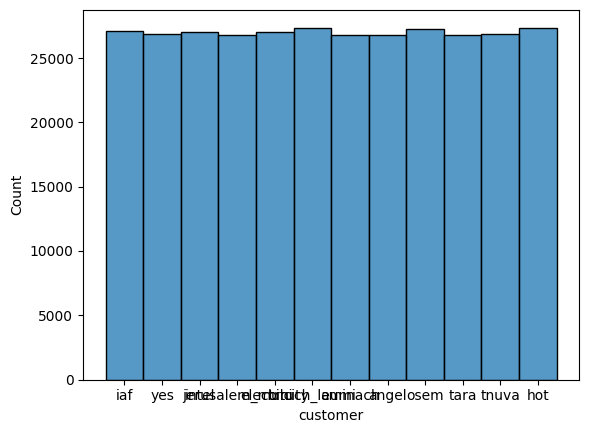

In [16]:
sns.histplot(x="customer", data=trips_df)

In [58]:
df1 = trips_df[trips_df["start_time"].dt.date == pd.to_datetime("2015-04-01").date()]
diffs=  ((df1["end_time"] - df1["start_time"]) / timedelta(hours=1))
kph = df1["km"] / ((df1["end_time"] - df1["start_time"]) / timedelta(hours=1))
df1["kph"] = kph
df1["diff"] = diffs
df1

C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_18348\184982217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["kph"] = kph
C:\Users\Ron Tohar\AppData\Local\Temp\ipykernel_18348\184982217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["diff"] = diffs


,customer,driver_id,end_time,km,start_time,kph,diff
0,iaf,570,2015-04-01 09:36:00,672.312716,2015-04-01 01:55:00,87.502740,7.683333
1,yes,822,2015-04-01 16:17:00,96.048221,2015-04-01 15:12:00,88.659896,1.083333
0,yes,145,2015-04-01 07:11:00,500.332355,2015-04-01 01:35:00,89.345063,5.600000
1,aminach,124,2015-04-01 15:31:00,64.362047,2015-04-01 14:45:00,83.950496,0.766667
0,yes,443,2015-04-01 03:26:00,42.505700,2015-04-01 02:53:00,77.283090,0.550000
...,...,...,...,...,...,...,...
1,intel,151,2015-04-01 18:24:00,478.712578,2015-04-01 12:24:00,79.785430,6.000000
0,angel,603,2015-04-01 04:55:00,143.683914,2015-04-01 02:36:00,62.021833,2.316667
1,osem,578,2015-04-01 20:30:00,391.478456,2015-04-01 15:15:00,74.567325,5.250000
0,iaf,840,2015-04-01 08:15:00,604.094143,2015-04-01 01:19:00,87.128963,6.933333


In [61]:
sns.lineplot(x=df1["start_time"].dt.time, y="kph", data=df1)
# df1["start_time"].dt.time

0    01:55:00
1    15:12:00
0    01:35:00
1    14:45:00
0    02:53:00
       ...   
1    12:24:00
0    02:36:00
1    15:15:00
0    01:19:00
1    15:02:00
Name: start_time, Length: 996, dtype: object